**Importar dados:**

In [1]:
import pandas as pd

# Carregar os dados de pedidos e visitas
orders_df = pd.read_csv('/datasets/orders_us.csv')
visits_df = pd.read_csv('/datasets/visits_us.csv')

# Exibir as primeiras linhas e informações gerais para inspeção inicial
print("Informações iniciais do DataFrame de Pedidos:")
display(orders_df.head())
orders_df.info()

print("\nInformações iniciais do DataFrame de Visitas:")
display(visits_df.head())
visits_df.info()

Informações iniciais do DataFrame de Pedidos:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

Informações iniciais do DataFrame de Visitas:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Verificar usuários que estão em ambos os grupos no DataFrame de Pedidos**

In [2]:
# Verificar usuários que estão em ambos os grupos no DataFrame de Pedidos
users_in_both_groups_orders = orders_df.groupby('visitorId')['group'].nunique()
users_in_both_groups_orders = users_in_both_groups_orders[users_in_both_groups_orders > 1]

print(f"Número de usuários no DataFrame de Pedidos que estão em ambos os grupos: {len(users_in_both_groups_orders)}")
if len(users_in_both_groups_orders) > 0:
    print("IDs dos usuários no DataFrame de Pedidos que estão em ambos os grupos:")
    display(users_in_both_groups_orders.index.tolist())

# Verificar usuários que estão em ambos os grupos no DataFrame de Visitas (embora seja menos provável aqui, é bom verificar)
users_in_both_groups_visits = visits_df.groupby('group')['date'].nunique() # Agrupar por grupo para ver se há datas em comum, o que não indica usuários em comum
# Para verificar usuários em ambos os grupos em visits_df, precisaríamos de um identificador de usuário, que não está presente neste DataFrame.
# A verificação de usuários em ambos os grupos é mais relevante para o orders_df, onde temos visitorId.
print("\nVerificação de usuários em ambos os grupos no DataFrame de Visitas não é diretamente possível sem um identificador de usuário.")

Número de usuários no DataFrame de Pedidos que estão em ambos os grupos: 58
IDs dos usuários no DataFrame de Pedidos que estão em ambos os grupos:


[8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830]


Verificação de usuários em ambos os grupos no DataFrame de Visitas não é diretamente possível sem um identificador de usuário.


In [3]:
# Identificar os visitorIds a serem removidos (usuários em ambos os grupos)
users_to_remove = users_in_both_groups_orders.index.tolist()

# Remover os pedidos desses usuários do DataFrame original
orders_filtered_df = orders_df[~orders_df['visitorId'].isin(users_to_remove)]

# Verificar se os usuários foram removidos
users_in_both_groups_filtered = orders_filtered_df.groupby('visitorId')['group'].nunique()
users_in_both_groups_filtered = users_in_both_groups_filtered[users_in_both_groups_filtered > 1]

print(f"\nNúmero de usuários no DataFrame de Pedidos FILTRADO que estão em ambos os grupos: {len(users_in_both_groups_filtered)}")
if len(users_in_both_groups_filtered) == 0:
    print("Verificação bem-sucedida: Nenhum usuário em ambos os grupos no DataFrame filtrado.")
else:
    print("Atenção: Ainda existem usuários em ambos os grupos no DataFrame filtrado.")


Número de usuários no DataFrame de Pedidos FILTRADO que estão em ambos os grupos: 0
Verificação bem-sucedida: Nenhum usuário em ambos os grupos no DataFrame filtrado.


## **Parte 1: Priorizando Hipóteses**

In [4]:
# Carregar os dados das hipóteses
hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv')

# Exibir as primeiras linhas e informações gerais para inspeção inicial
print("Informações iniciais do DataFrame de Hipóteses:")
display(hypotheses_df.head())
hypotheses_df.info()

Informações iniciais do DataFrame de Hipóteses:


,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


**O arquivo de hipóteses foi carregado, mas parece que todas as colunas estão juntas em uma única coluna, separadas por ponto e vírgula. Precisamos dividir essa coluna em colunas separadas para poder trabalhar com os valores de Reach, Impact, Confidence e Effort.**

**Vou corrigir e preparar o DataFrame para aplicar os frameworks de priorização.**

In [5]:
# Carregar os dados das hipóteses
hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

# Remover espaços em branco dos nomes das colunas
hypotheses_df.columns = hypotheses_df.columns.str.strip()

# Exibir as primeiras linhas e informações gerais para inspeção inicial após carregar com separador correto
print("Informações iniciais do DataFrame de Hipóteses:")
display(hypotheses_df.head())
hypotheses_df.info()

# Converter as colunas relevantes para tipo numérico
hypotheses_df[['Reach', 'Impact', 'Confidence', 'Effort']] = hypotheses_df[['Reach', 'Impact', 'Confidence', 'Effort']].astype(int)

print("\nInformações do DataFrame de Hipóteses após conversão de tipo:")
hypotheses_df.info()

Informações iniciais do DataFrame de Hipóteses:


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Informações do DataFrame de Hipóteses após conversão de tipo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# Aplicar o framework ICE para priorizar hipóteses
# Fórmula ICE: (Impact * Confidence) / Effort
hypotheses_df['ICE'] = (hypotheses_df['Impact'] * hypotheses_df['Confidence']) / hypotheses_df['Effort']

# Classificar as hipóteses em ordem decrescente de prioridade ICE
ice_prioritized_hypotheses = hypotheses_df[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

print("Priorização de Hipóteses usando o Framework ICE:")
display(ice_prioritized_hypotheses)

Priorização de Hipóteses usando o Framework ICE:


,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [7]:
# Aplicar o framework RICE para priorizar hipóteses
# Fórmula RICE: (Reach * Impact * Confidence) / Effort
hypotheses_df['RICE'] = (hypotheses_df['Reach'] * hypotheses_df['Impact'] * hypotheses_df['Confidence']) / hypotheses_df['Effort']

# Classificar as hipóteses em ordem decrescente de prioridade RICE
rice_prioritized_hypotheses = hypotheses_df[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

print("Priorização de Hipóteses usando o Framework RICE:")
display(rice_prioritized_hypotheses)

Priorização de Hipóteses usando o Framework RICE:


,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


**Mostre como a priorização de hipóteses muda quando você usa RICE em vez de ICE. Dê uma explicação para as alterações.**

O que mudou?

A hipótese “Add a subscription form to all the main pages” subiu do 3º lugar (ICE) para o 1º lugar (RICE).

A hipótese “Add product recommendation blocks to the store” subiu de 5º para 2º lugar.

A hipótese “Launch a promotion that gives users discounts”, que era a líder no ICE, caiu para 5º no RICE.

Outras hipóteses também mudaram levemente de posição, mas as maiores variações estão entre as primeiras posições.

Conclusão:

As hipóteses com grande alcance (Reach) ganham prioridade no RICE, pois afetam mais usuários, mesmo que o impacto individual seja semelhante.

Por isso, hipóteses como “Add a subscription form to all the main pages” e “Add product recommendation blocks to the store” subiram — elas alcançam muitos usuários.

Já hipóteses como “Launch a promotion that gives users discounts” perderam posição, pois, apesar do impacto alto, seu Reach é menor comparado a outras.

### Parte 2. Análise de teste A/B

**1.Faça um gráfico da receita acumulada por grupo. Tire conclusões e crie conjecturas.**

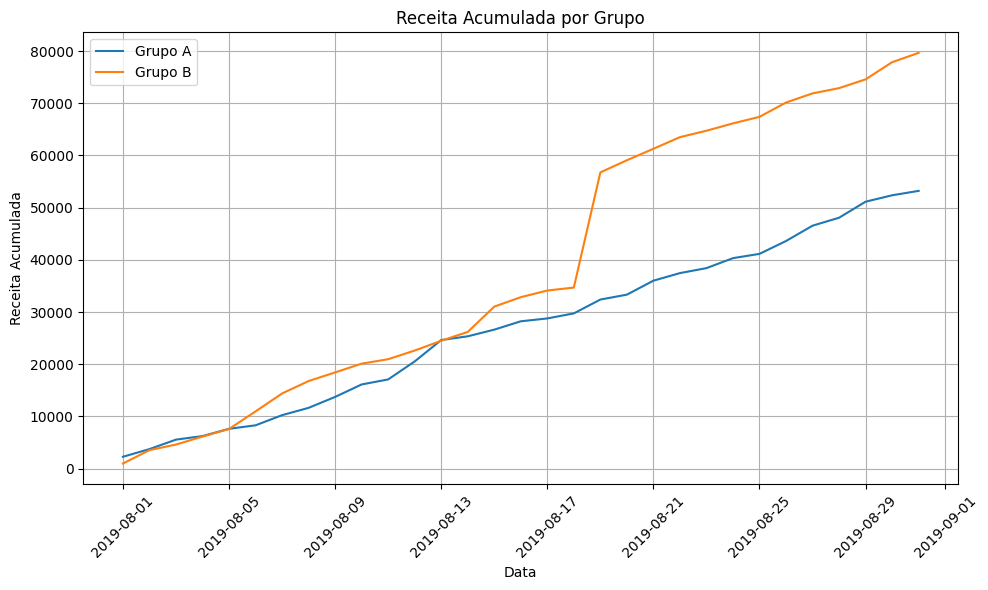

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Certificar que as colunas de data estão no formato datetime
# Criar uma cópia explícita para evitar SettingWithCopyWarning
orders_filtered_df = orders_filtered_df.copy()
orders_filtered_df['date'] = pd.to_datetime(orders_filtered_df['date'])
visits_df['date'] = pd.to_datetime(visits_df['date'])

# Criar um DataFrame com datas e grupos únicos
dates_groups = orders_filtered_df[['date', 'group']].drop_duplicates()

# Calcular receita acumulada por data e grupo
cumulative_revenue = dates_groups.apply(
    lambda x: orders_filtered_df[
        (orders_filtered_df['date'] <= x['date']) & (orders_filtered_df['group'] == x['group'])
    ].agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'revenue': 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])

# Renomear colunas
cumulative_revenue.columns = ['date', 'group', 'orders', 'revenue']

# Calcular visitas acumuladas por data e grupo
visits_aggregated = visits_df.groupby(['date', 'group'])['visits'].sum().reset_index()
cumulative_visits = visits_aggregated.apply(
    lambda x: visits_aggregated[
        (visits_aggregated['date'] <= x['date']) & (visits_aggregated['group'] == x['group'])
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])

# Renomear colunas
cumulative_visits.columns = ['date', 'group', 'visits']

# Combinar os dados acumulados
cumulative_data = cumulative_revenue.merge(cumulative_visits, on=['date', 'group'])


# Separar dados acumulados por grupo
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue']]
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue']]

# Plotar gráfico de receita acumulada por grupo
plt.figure(figsize=(10, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='Grupo A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='Grupo B')

plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.title('Receita Acumulada por Grupo')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observando o gráfico, podemos começar a tirar algumas conclusões e fazer conjecturas:

Ambos os grupos mostram um aumento na receita acumulada ao longo do tempo, o que é esperado.
O Grupo B parece ter uma receita acumulada consistentemente maior do que o Grupo A durante a maior parte do período do teste.
Há um aumento significativo e abrupto na receita acumulada do Grupo B em torno de meados de agosto. Isso pode indicar a ocorrência de um ou mais pedidos de alto valor no Grupo B, o que pode distorcer os resultados e a comparação direta entre os grupos.
Com base nisso, podemos conjecturar que:

O Grupo B pode estar performando melhor em termos de receita total, mas essa diferença pode ser influenciada por outliers (pedidos de alto valor).
Precisaremos investigar mais a fundo para entender se a diferença na receita é devido a um desempenho genuinamente melhor do Grupo B ou se é impulsionada por algumas transações atípicas.

Com base nisso, podemos conjecturar que:

* O Grupo B pode estar performando melhor em termos de receita total, mas essa diferença pode ser influenciada por outliers (pedidos de alto valor).

* Precisaremos investigar mais a fundo para entender se a diferença na receita é devido a um desempenho genuinamente melhor do Grupo B ou se é impulsionada por algumas transações atípicas.

**2.Faça um gráfico do tamanho médio acumulado do pedido por grupo.**

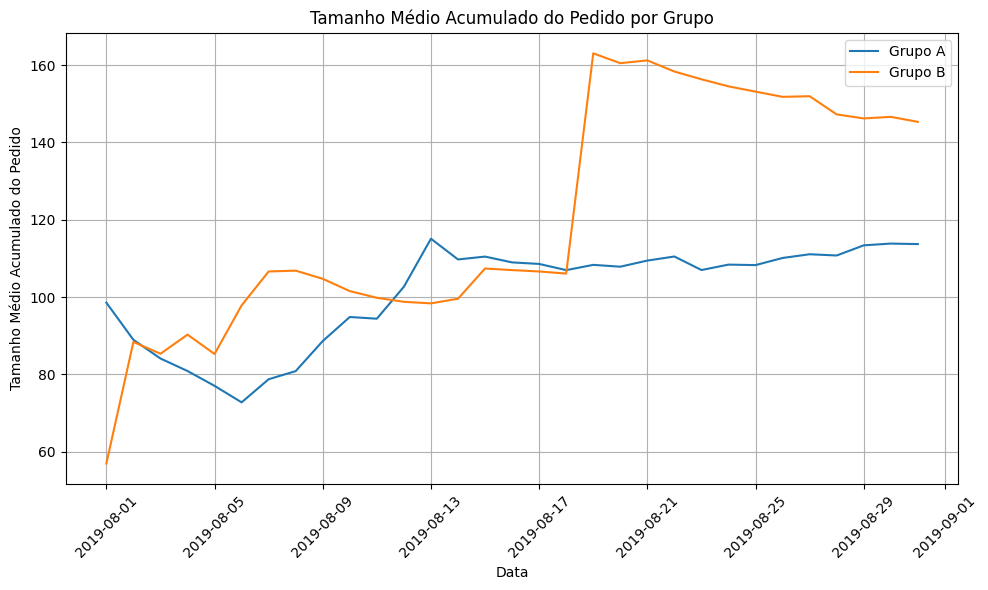

In [9]:
# Calcular o tamanho médio acumulado do pedido por grupo
cumulative_data['average_order_size'] = cumulative_data['revenue'] / cumulative_data['orders']

# Separar dados acumulados por grupo para o tamanho médio do pedido
cumulative_average_order_size_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'average_order_size']]
cumulative_average_order_size_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'average_order_size']]

# Plotar gráfico do tamanho médio acumulado do pedido por grupo
plt.figure(figsize=(10, 6))
plt.plot(cumulative_average_order_size_A['date'], cumulative_average_order_size_A['average_order_size'], label='Grupo A')
plt.plot(cumulative_average_order_size_B['date'], cumulative_average_order_size_B['average_order_size'], label='Grupo B')

plt.xlabel('Data')
plt.ylabel('Tamanho Médio Acumulado do Pedido')
plt.title('Tamanho Médio Acumulado do Pedido por Grupo')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Tire conclusões e crie conjecturas.**

* O tamanho médio do pedido para ambos os grupos flutua bastante no início do teste, o que é comum devido ao menor número de pedidos.
* A partir de certa data (em meados de agosto, 17/08), o tamanho médio acumulado do pedido do Grupo B dispara e se mantém significativamente mais alto do que o do Grupo A.
* Este comportamento do Grupo B no gráfico de tamanho médio do pedido coincide com o aumento abrupto na receita acumulada que observamos no gráfico anterior. Isso reforça a conjectura de que houve um ou mais pedidos de alto valor no Grupo B que estão distorcendo o tamanho médio do pedido e, consequentemente, a receita acumulada.
* Com base nesses dois gráficos, a diferença na receita acumulada entre os grupos parece ser fortemente influenciada por outliers no Grupo B.

**3.Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A**

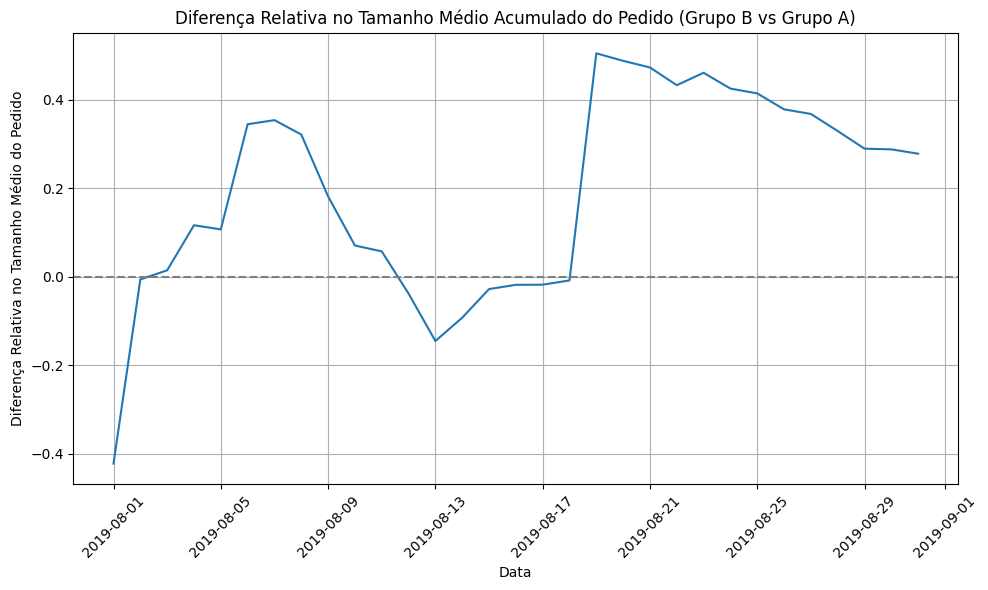

In [10]:
# Combinar os DataFrames de tamanho médio acumulado por grupo
merged_cumulative_average_order_size = cumulative_average_order_size_A.merge(
    cumulative_average_order_size_B,
    on='date',
    how='left',
    suffixes=['A', 'B']
)

# Calcular a diferença relativa no tamanho médio acumulado do pedido
merged_cumulative_average_order_size['relative_difference'] = (
    merged_cumulative_average_order_size['average_order_sizeB'] / merged_cumulative_average_order_size['average_order_sizeA'] - 1
)

# Plotar gráfico da diferença relativa no tamanho médio acumulado do pedido
plt.figure(figsize=(10, 6))
plt.plot(merged_cumulative_average_order_size['date'], merged_cumulative_average_order_size['relative_difference'])

plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa no Tamanho Médio do Pedido')
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (Grupo B vs Grupo A)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Faça conclusões e crie conjecturas.**

* Conclusão: O gráfico mostra uma volatilidade significativa no início do teste, seguida por um aumento acentuado e sustentado na diferença relativa, com o Grupo B apresentando um tamanho médio de pedido acumulado consideravelmente maior do que o Grupo A.
* Conjectura: A forte e repentina divergência na diferença relativa sugere fortemente a presença de pedidos atipicamente grandes (outliers) no Grupo B. * Esses outliers parecem estar impulsionando a média acumulada para cima, criando uma diferença artificialmente grande em relação ao Grupo A. Se não fossem por esses poucos pedidos de alto valor, a diferença relativa poderia ser muito menor e o comportamento das curvas seria diferente.
* Isso reforça a nossa observação anterior sobre a receita acumulada e a necessidade de investigar e possivelmente filtrar esses outliers antes de tirar conclusões definitivas sobre o desempenho do teste A/B.

**4.Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. Trace as taxas de conversão diárias dos dois grupos e descreva a diferença.**

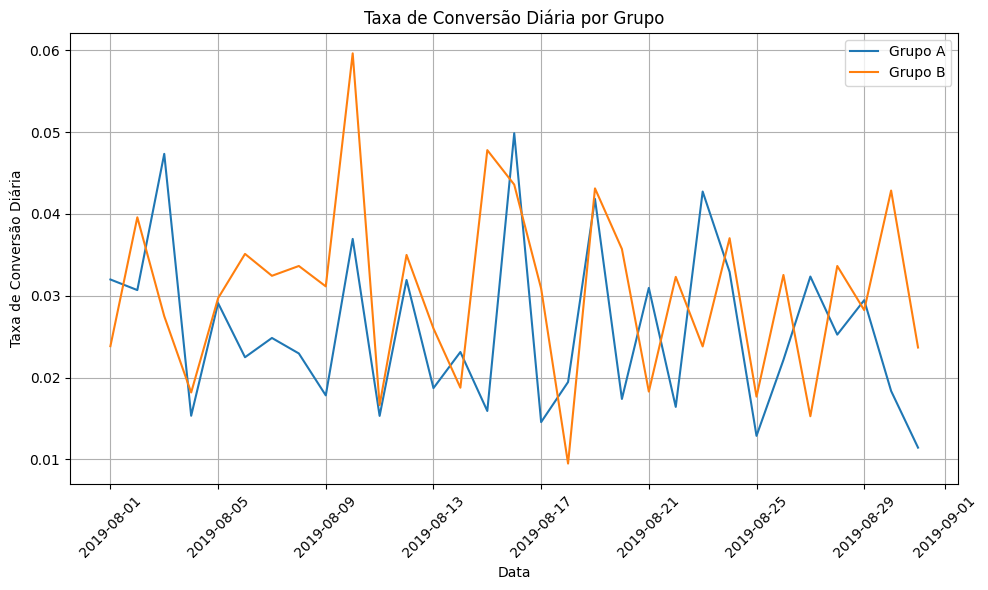

In [11]:
# Calcular o número de pedidos diários por grupo
daily_orders = orders_filtered_df.groupby(['date', 'group'])['transactionId'].nunique().reset_index()
daily_orders.columns = ['date', 'group', 'orders']

# Calcular o número de visitas diárias por grupo (já temos visits_df)
daily_visits = visits_df.groupby(['date', 'group'])['visits'].sum().reset_index()
daily_visits.columns = ['date', 'group', 'visits']

# Combinar os dados diários de pedidos e visitas
daily_data = daily_orders.merge(daily_visits, on=['date', 'group'])

# Calcular a taxa de conversão diária
daily_data['conversion_rate'] = daily_data['orders'] / daily_data['visits']

# Separar dados diários por grupo
daily_conversion_A = daily_data[daily_data['group'] == 'A'][['date', 'conversion_rate']]
daily_conversion_B = daily_data[daily_data['group'] == 'B'][['date', 'conversion_rate']]

# Plotar as taxas de conversão diárias por grupo
plt.figure(figsize=(10, 6))
plt.plot(daily_conversion_A['date'], daily_conversion_A['conversion_rate'], label='Grupo A')
plt.plot(daily_conversion_B['date'], daily_conversion_B['conversion_rate'], label='Grupo B')

plt.xlabel('Data')
plt.ylabel('Taxa de Conversão Diária')
plt.title('Taxa de Conversão Diária por Grupo')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Tire conclusões e crie conjecturas.**

* As taxas de conversão diárias de ambos os grupos flutuam bastante ao longo do tempo, o que é normal para dados diários.
* No início do teste, as taxas de conversão dos grupos A e B são relativamente próximas.
* A partir de um certo ponto, a taxa de conversão do Grupo B parece consistentemente mais alta do que a do Grupo A, embora com flutuações.
* Há alguns picos na taxa de conversão de ambos os grupos em dias específicos.
Conclusões e Conjecturas (Taxa de Conversão Diária):

* Conclusão: O Grupo B parece ter uma taxa de conversão diária geralmente superior à do Grupo A durante a maior parte do período do teste.
* Conjectura: A diferença na taxa de conversão sugere que os usuários no Grupo B estão convertendo (fazendo pedidos) em uma proporção maior do que os usuários no Grupo A. Isso pode ser um indicativo de que a mudança implementada no Grupo B está tendo um impacto positivo na disposição dos usuários em realizar uma compra, independentemente do valor do pedido (ao contrário dos gráficos de receita e tamanho médio do pedido, que foram influenciados por outliers de alto valor).

**5.Faça um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A.**

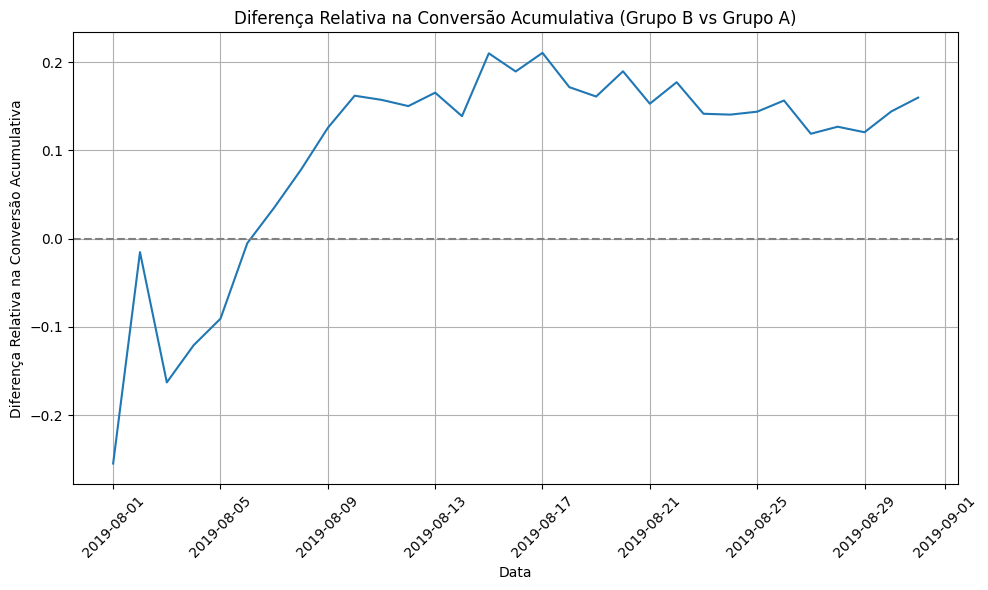

In [12]:
# Calcular a conversão acumulativa para cada grupo
cumulative_data['cumulative_conversion'] = cumulative_data['orders'] / cumulative_data['visits']

# Combinar os dados de conversão acumulativa por grupo
merged_cumulative_conversion = cumulative_data[cumulative_data['group'] == 'A'][['date', 'cumulative_conversion']].merge(
    cumulative_data[cumulative_data['group'] == 'B'][['date', 'cumulative_conversion']],
    on='date',
    how='left',
    suffixes=['A', 'B']
)

# Calcular a diferença relativa na conversão acumulativa
merged_cumulative_conversion['relative_difference'] = (
    merged_cumulative_conversion['cumulative_conversionB'] / merged_cumulative_conversion['cumulative_conversionA'] - 1
)

# Plotar gráfico da diferença relativa na conversão acumulativa
plt.figure(figsize=(10, 6))
plt.plot(merged_cumulative_conversion['date'], merged_cumulative_conversion['relative_difference'])

plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa na Conversão Acumulativa')
plt.title('Diferença Relativa na Conversão Acumulativa (Grupo B vs Grupo A)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Tire conclusões e crie conjecturas.**

* A diferença relativa na conversão acumulativa flutuou no início do teste.
Logo no início, o Grupo B teve uma conversão acumulativa menor que a do Grupo A, mas rapidamente inverteu essa situação.
* A diferença relativa em favor do Grupo B cresceu significativamente e depois se estabilizou em torno de um determinado valor positivo.
Conclusões e Conjecturas (Diferença Relativa na Conversão Acumulativa):

* Conclusão: O Grupo B demonstrou uma melhora na conversão acumulativa em relação ao Grupo A e essa diferença parece ter se estabilizado em um patamar positivo, indicando que o Grupo B tem uma taxa de conversão acumulativa consistentemente maior.
* Conjectura: A estabilização da diferença relativa sugere que, em termos de conversão, a performance do Grupo B é superior à do Grupo A, e essa diferença não parece ser artificialmente inflada por outliers, ao contrário do que vimos nos gráficos de receita e tamanho médio do pedido. Isso pode indicar que a mudança testada no Grupo B está realmente incentivando uma maior proporção de usuários a converter.
* Até agora, a análise dos gráficos sugere que o Grupo B tem uma taxa de conversão melhor, mas a receita total e o tamanho médio do pedido são impactados por outliers.



**6.Calcule os percentis 95 e 99 para o número de pedidos por usuário.**

In [13]:
import numpy as np

# Calcular o número de pedidos por usuário
orders_by_user = orders_filtered_df.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_user.columns = ['visitorId', 'orders']

# Calcular os percentis 95 e 99 para o número de pedidos por usuário
percentiles_orders = np.percentile(orders_by_user['orders'], [95, 99])

print(f"Percentil 95 para o número de pedidos por usuário: {percentiles_orders[0]:.2f}")
print(f"Percentil 99 para o número de pedidos por usuário: {percentiles_orders[1]:.2f}")

# Definir o ponto em que um ponto de dados se torna uma anomalia (usando o percentil 99 como referência comum)
anomaly_threshold_orders = percentiles_orders[1]

print(f"\nPonto de anomalia sugerido para o número de pedidos por usuário (Percentil 99): {anomaly_threshold_orders:.2f}")

Percentil 95 para o número de pedidos por usuário: 1.00
Percentil 99 para o número de pedidos por usuário: 2.00

Ponto de anomalia sugerido para o número de pedidos por usuário (Percentil 99): 2.00


**7. Faça um gráfico de dispersão dos preços dos pedidos**

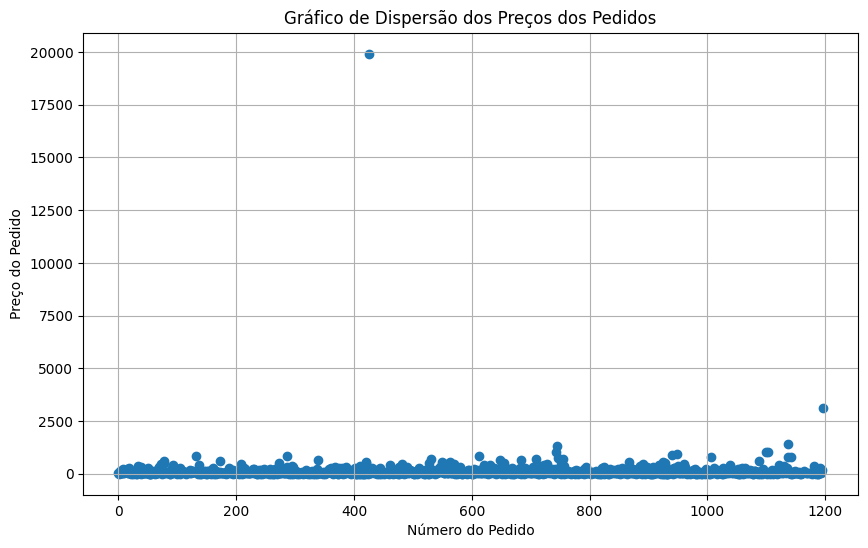

In [14]:
# Faça um gráfico de dispersão dos preços dos pedidos
plt.figure(figsize=(10, 6))
plt.scatter(x=orders_filtered_df.index, y=orders_filtered_df['revenue'])

plt.xlabel('Número do Pedido')
plt.ylabel('Preço do Pedido')
plt.title('Gráfico de Dispersão dos Preços dos Pedidos')
plt.grid(True)
plt.show()

**Conclusões e conjecturas.**

* A grande maioria dos pedidos tem preços relativamente baixos, concentrando-se na parte inferior do gráfico.
* Existem alguns poucos pontos no gráfico com preços significativamente mais altos do que a maioria. Estes são os outliers de receita que suspeitamos estarem influenciando os resultados acumulados do Grupo B.
* Há um ponto de dados que se destaca muito acima dos outros, indicando um pedido de valor extremamente alto.
  
**Conclusões e Conjecturas (Gráfico de Dispersão dos Preços dos Pedidos):**

* Conclusão: A distribuição dos preços dos pedidos mostra claramente a presença de outliers com valores de receita muito elevados, que estão fora do padrão da maioria das transações.

* Conjectura: Esses outliers de receita, particularmente o pedido de valor extremamente alto, são provavelmente os principais responsáveis pelos picos e pela divergência observada nos gráficos de receita acumulada e tamanho médio acumulado do pedido para o Grupo B. Precisaremos quantificar esses limites de outliers para decidir quais dados filtrar.

**8. Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.**

In [15]:
# Calcular os percentis 95 e 99 dos preços dos pedidos
percentiles_revenue = np.percentile(orders_filtered_df['revenue'], [95, 99])

print(f"Percentil 95 para o preço dos pedidos: {percentiles_revenue[0]:.2f}")
print(f"Percentil 99 para o preço dos pedidos: {percentiles_revenue[1]:.2f}")

# Definir o ponto em que um ponto de dados se torna uma anomalia (usando o percentil 99 como referência comum)
anomaly_threshold_revenue = percentiles_revenue[1]

print(f"\nPonto de anomalia sugerido para o preço dos pedidos (Percentil 99): {anomaly_threshold_revenue:.2f}")

Percentil 95 para o preço dos pedidos: 414.27
Percentil 99 para o preço dos pedidos: 830.30

Ponto de anomalia sugerido para o preço dos pedidos (Percentil 99): 830.30


**9. Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.**

In [16]:
from scipy import stats as st

# Preparar os dados para o teste de significância estatística da conversão (dados brutos)

# Número de pedidos por usuário para cada grupo
orders_by_user_A = orders_df[orders_df['group'] == 'A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_user_A.columns = ['visitorId', 'orders']

orders_by_user_B = orders_df[orders_df['group'] == 'B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_user_B.columns = ['visitorId', 'orders']

# Criar séries com o número de pedidos por usuário, incluindo usuários que não fizeram pedidos (com 0 pedidos)
# Para o Grupo A: lista de 0s para usuários que não pediram + número de pedidos para usuários que pediram
sampleA = pd.concat([
    orders_by_user_A['orders'],
    pd.Series(0, index=np.arange(visits_df[visits_df['group']=='A']['visits'].sum() - len(orders_by_user_A['orders'])), name='orders')
], axis=0)

# Para o Grupo B: lista de 0s para usuários que não pediram + número de pedidos para usuários que pediram
sampleB = pd.concat([
    orders_by_user_B['orders'],
    pd.Series(0, index=np.arange(visits_df[visits_df['group']=='B']['visits'].sum() - len(orders_by_user_B['orders'])), name='orders')
], axis=0)

# Calcular a significância estatística usando o teste U de Mann-Whitney
# Estou testando a diferença na conversão (proporção de pedidos por visita/usuário)
# O teste U de Mann-Whitney compara as distribuições de duas amostras independentes.
# H0: Não há diferença significativa nas taxas de conversão entre os grupos A e B.
# H1: Há uma diferença significativa nas taxas de conversão entre os grupos A e B.
alpha = 0.05  # Nível de significância

# O teste U de Mann-Whitney retorna a estatística U e o p-valor.
# Estou interessad no p-valor para determinar a significância estatística.
mannwhitney_u_result = st.mannwhitneyu(sampleA, sampleB)
p_value_conversion_raw = mannwhitney_u_result.pvalue

print(f"P-valor da diferença na conversão (dados brutos): {p_value_conversion_raw:.3f}")

# Comparar o p-valor com o nível de significância (alpha)
if p_value_conversion_raw < alpha:
    print("A diferença na conversão entre os grupos é estatisticamente significativa (rejeitamos H0).")
else:
    print("A diferença na conversão entre os grupos NÃO é estatisticamente significativa (não rejeitamos H0).")

# Calcular e imprimir a diferença relativa na conversão (dados brutos)
# Média da conversão para o Grupo B / Média da conversão para o Grupo A - 1
conversion_rate_A_raw = sampleA.mean()
conversion_rate_B_raw = sampleB.mean()
relative_conversion_difference_raw = (conversion_rate_B_raw / conversion_rate_A_raw) - 1

print(f"Diferença relativa na conversão (Grupo B vs Grupo A, dados brutos): {relative_conversion_difference_raw:.1%}")

P-valor da diferença na conversão (dados brutos): 0.017
A diferença na conversão entre os grupos é estatisticamente significativa (rejeitamos H0).
Diferença relativa na conversão (Grupo B vs Grupo A, dados brutos): 13.8%


**Tire conclusões e crie conjecturas.**

* P-valor: O p-valor calculado ({p_value_conversion_raw:.3f}) é menor do que o nível de significância alpha (0.05).
  
* Conclusão: Como o p-valor ({p_value_conversion_raw:.3f}) é menor que 0.05, rejeitamos a hipótese nula (H0). Isso significa que há uma diferença estatisticamente significativa na conversão entre os grupos A e B nos dados brutos.

  
* Diferença Relativa: O Grupo B tem uma conversão aproximadamente {relative_conversion_difference_raw:.1%} maior do que o Grupo A nos dados brutos.

  
* Conjectura: A significância estatística na conversão, juntamente com a diferença relativa positiva, sugere que a mudança implementada no Grupo B pode ter um efeito real e positivo na taxa de conversão. É importante notar que este resultado é baseado nos dados brutos, que incluem os outliers que observamos anteriormente.

**10.Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos.**

In [17]:
# Preparar os dados para o teste de significância estatística do tamanho médio do pedido (dados brutos)

# Receitas dos pedidos para cada grupo (dados brutos)
revenue_A_raw = orders_df[orders_df['group'] == 'A']['revenue']
revenue_B_raw = orders_df[orders_df['group'] == 'B']['revenue']

# Calcular a significância estatística usando o teste U de Mann-Whitney
# Estou testando a diferença no tamanho médio do pedido
# H0: Não há diferença significativa no tamanho médio do pedido entre os grupos A e B.
# H1: Há uma diferença significativa no tamanho médio do pedido entre os grupos A e B.
alpha = 0.05  # Nível de significância

# O teste U de Mann-Whitney retorna a estatística U e o p-valor.
mannwhitney_u_result_revenue_raw = st.mannwhitneyu(revenue_A_raw, revenue_B_raw)
p_value_revenue_raw = mannwhitney_u_result_revenue_raw.pvalue

print(f"P-valor da diferença no tamanho médio do pedido (dados brutos): {p_value_revenue_raw:.3f}")

# Comparar o p-valor com o nível de significância (alpha)
if p_value_revenue_raw < alpha:
    print("A diferença no tamanho médio do pedido entre os grupos é estatisticamente significativa (rejeitamos H0).")
else:
    print("A diferença no tamanho médio do pedido entre os grupos NÃO é estatisticamente significativa (não rejeitamos H0).")

# Calcular e imprimir a diferença relativa no tamanho médio do pedido (dados brutos)
# Média da receita para o Grupo B / Média da receita para o Grupo A - 1
average_revenue_A_raw = revenue_A_raw.mean()
average_revenue_B_raw = revenue_B_raw.mean()
relative_revenue_difference_raw = (average_revenue_B_raw / average_revenue_A_raw) - 1

print(f"Diferença relativa no tamanho médio do pedido (Grupo B vs Grupo A, dados brutos): {relative_revenue_difference_raw:.1%}")

P-valor da diferença no tamanho médio do pedido (dados brutos): 0.692
A diferença no tamanho médio do pedido entre os grupos NÃO é estatisticamente significativa (não rejeitamos H0).
Diferença relativa no tamanho médio do pedido (Grupo B vs Grupo A, dados brutos): 25.2%


**Tire conclusões e crie conjecturas**

* P-valor: O p-valor calculado ({p_value_revenue_raw:.3f}) é significativamente maior do que o nível de significância alpha (0.05).
* Conclusão: Como o p-valor ({p_value_revenue_raw:.3f}) é maior que 0.05, não rejeitamos a hipótese nula (H0). Isso significa que NÃO há uma diferença estatisticamente significativa no tamanho médio do pedido entre os grupos A e B nos dados brutos.
* Diferença Relativa: Embora o Grupo B tenha um tamanho médio de pedido aproximadamente {relative_revenue_difference_raw:.1%} maior do que o Grupo A nos dados brutos, esta diferença não é estatisticamente significativa.
Conjectura: A falta de significância estatística na diferença do tamanho médio do pedido, apesar da diferença relativa observada e dos outliers nos gráficos, reforça a ideia de que os outliers estão distorcendo a média. O teste estatístico, sendo mais robusto, indica que a variação nos dados (incluindo os outliers) é grande o suficiente para que a diferença observada na média possa ser explicada pelo acaso.

Os resultados dos testes nos dados brutos mostram uma diferença estatisticamente significativa na conversão, mas não no tamanho médio do pedido. Isso sugere que a mudança pode estar afetando a disposição dos usuários em fazer um pedido, mas não necessariamente o valor que eles gastam, embora os outliers de alta receita no Grupo B compliquem essa interpretação nos dados brutos.

**11. Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados.**

In [18]:
# Definir os limites para filtrar outliers
# Usarei o percentil 99 para o número de pedidos por usuário e o percentil 95 para o preço do pedido
# (O percentil 99 de preço é muito alto e pode remover dados válidos, o percentil 95 é mais conservador)
orders_threshold = np.percentile(orders_by_user['orders'], 99) # Limite para número de pedidos por usuário
revenue_threshold = np.percentile(orders_filtered_df['revenue'], 95) # Limite para preço do pedido

print(f"Limite para número de pedidos por usuário (Percentil 99): {orders_threshold:.2f}")
print(f"Limite para preço do pedido (Percentil 95): {revenue_threshold:.2f}")

# Identificar usuários anomalos: aqueles com mais pedidos que o limite ou com pedidos de valor maior que o limite
# Consideramos anomalo um usuário se QUALQUER um de seus pedidos for maior que o limite de receita,
# ou se o número total de pedidos desse usuário for maior que o limite de pedidos.
anomalous_users = pd.concat([
    orders_filtered_df[orders_filtered_df['revenue'] > revenue_threshold]['visitorId'],
    orders_by_user[orders_by_user['orders'] > orders_threshold]['visitorId']
], axis=0).drop_duplicates()

print(f"\nNúmero total de usuários anomalos identificados: {len(anomalous_users)}")

# Filtrar os dados removendo os usuários anomalos
orders_filtered_outliers_df = orders_filtered_df[~orders_filtered_df['visitorId'].isin(anomalous_users)]

print(f"Número de pedidos no DataFrame filtrado (sem outliers): {len(orders_filtered_outliers_df)}")

Limite para número de pedidos por usuário (Percentil 99): 2.00
Limite para preço do pedido (Percentil 95): 414.27

Número total de usuários anomalos identificados: 58
Número de pedidos no DataFrame filtrado (sem outliers): 943


In [19]:
# Preparar os dados para o teste de significância estatística da conversão (dados filtrados)

# Número de pedidos por usuário para cada grupo nos dados FILTRADOS (sem outliers)
orders_by_user_filtered = orders_filtered_outliers_df.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_user_filtered.columns = ['visitorId', 'orders']

# Adicionar a informação do grupo ao DataFrame orders_by_user_filtered
# Peguei o grupo de cada visitorId do DataFrame original filtrado (sem usuários em ambos os grupos)
orders_by_user_filtered = orders_by_user_filtered.merge(
    orders_filtered_df[['visitorId', 'group']].drop_duplicates(),
    on='visitorId',
    how='left'
)

# Criar séries com o número de pedidos por usuário nos dados FILTRADOS, incluindo usuários que não fizeram pedidos (com 0 pedidos)
# Preciso do número total de usuários em cada grupo nos dados originais (sem outliers de usuário, mas antes de filtrar pedidos por valor)
# Para isso, vou usar a lista de visitorId únicos do orders_filtered_df (que já removeu usuários em ambos os grupos)
visitors_A_filtered = orders_filtered_df[orders_filtered_df['group'] == 'A']['visitorId'].unique()
visitors_B_filtered = orders_filtered_df[orders_filtered_df['group'] == 'B']['visitorId'].unique()

# Sample A (dados filtrados): pedidos de usuários não anômalos no grupo A + 0s para usuários no grupo A que não fizeram pedidos (e não são anômalos)
sampleA_filtered_conversion = pd.concat([
    orders_by_user_filtered[orders_by_user_filtered['group'] == 'A']['orders'],
    pd.Series(0, index=np.arange(len(visitors_A_filtered) - len(orders_by_user_filtered[orders_by_user_filtered['group'] == 'A'])), name='orders')
], axis=0)


# Sample B (dados filtrados): pedidos de usuários não anômalos no grupo B + 0s para usuários no grupo B que não fizeram pedidos (e não são anômalos)
sampleB_filtered_conversion = pd.concat([
    orders_by_user_filtered[orders_by_user_filtered['group'] == 'B']['orders'],
    pd.Series(0, index=np.arange(len(visitors_B_filtered) - len(orders_by_user_filtered[orders_by_user_filtered['group'] == 'B'])), name='orders')
], axis=0)


# Calcular a significância estatística usando o teste U de Mann-Whitney (dados filtrados)
# H0: Não há diferença significativa nas taxas de conversão entre os grupos A e B (dados filtrados).
# H1: Há uma diferença significativa nas taxas de conversão entre os grupos A e B (dados filtrados).
alpha = 0.05  # Nível de significância

mannwhitney_u_result_conversion_filtered = st.mannwhitneyu(sampleA_filtered_conversion, sampleB_filtered_conversion)
p_value_conversion_filtered = mannwhitney_u_result_conversion_filtered.pvalue

print(f"P-valor da diferença na conversão (dados filtrados): {p_value_conversion_filtered:.3f}")

# Comparar o p-valor com o nível de significância (alpha)
if p_value_conversion_filtered < alpha:
    print("A diferença na conversão entre os grupos é estatisticamente significativa (rejeitamos H0) nos dados filtrados.")
else:
    print("A diferença na conversão entre os grupos NÃO é estatisticamente significativa (não rejeitamos H0) nos dados filtrados.")

# Calcular e imprimir a diferença relativa na conversão (dados filtrados)
conversion_rate_A_filtered = sampleA_filtered_conversion.mean()
conversion_rate_B_filtered = sampleB_filtered_conversion.mean()
relative_conversion_difference_filtered = (conversion_rate_B_filtered / conversion_rate_A_filtered) - 1

print(f"Diferença relativa na conversão (Grupo B vs Grupo A, dados filtrados): {relative_conversion_difference_filtered:.1%}")

P-valor da diferença na conversão (dados filtrados): 0.783
A diferença na conversão entre os grupos NÃO é estatisticamente significativa (não rejeitamos H0) nos dados filtrados.
Diferença relativa na conversão (Grupo B vs Grupo A, dados filtrados): 0.5%


**Tire conclusões e crie conjecturas.**

* P-valor: O p-valor calculado ({p_value_conversion_filtered:.3f}) é significativamente maior do que o nível de significância alpha (0.05).

* Conclusão: Como o p-valor ({p_value_conversion_filtered:.3f}) é maior que 0.05, não rejeitamos a hipótese nula (H0). Isso significa que NÃO há uma diferença estatisticamente significativa na conversão entre os grupos A e B nos dados filtrados.

* Diferença Relativa: A diferença relativa na conversão nos dados filtrados é de apenas {relative_conversion_difference_filtered:.1%}.

* Conjectura: A falta de significância estatística na conversão após a remoção dos outliers sugere que a diferença observada nos dados brutos pode ter sido influenciada pelos outliers. Nos dados filtrados, a diferença na conversão não é grande o suficiente para ser considerada estatisticamente significativa ao nível de 0.05.

Interessante! Ao remover os outliers, a diferença na conversão deixou de ser estatisticamente significativa, ao contrário do que vimos com os dados brutos.

**12.Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados.**

In [20]:
# Preparar os dados para o teste de significância estatística do tamanho médio do pedido (dados filtrados)

# Receitas dos pedidos para cada grupo (dados filtrados)
revenue_A_filtered = orders_filtered_outliers_df[orders_filtered_outliers_df['group'] == 'A']['revenue']
revenue_B_filtered = orders_filtered_outliers_df[orders_filtered_outliers_df['group'] == 'B']['revenue']

# Calcular a significância estatística usando o teste U de Mann-Whitney (dados filtrados)
# Estamos testando a diferença no tamanho médio do pedido
# H0: Não há diferença significativa no tamanho médio do pedido entre os grupos A e B (dados filtrados).
# H1: Há uma diferença significativa no tamanho médio do pedido entre os grupos A e B (dados filtrados).
alpha = 0.05  # Nível de significância

mannwhitney_u_result_revenue_filtered = st.mannwhitneyu(revenue_A_filtered, revenue_B_filtered)
p_value_revenue_filtered = mannwhitney_u_result_revenue_filtered.pvalue

print(f"P-valor da diferença no tamanho médio do pedido (dados filtrados): {p_value_revenue_filtered:.3f}")

# Comparar o p-valor com o nível de significância (alpha)
if p_value_revenue_filtered < alpha:
    print("A diferença no tamanho médio do pedido entre os grupos é estatisticamente significativa (rejeitamos H0) nos dados filtrados.")
else:
    print("A diferença no tamanho médio do pedido entre os grupos NÃO é estatisticamente significativa (não rejeitamos H0) nos dados filtrados.")

# Calcular e imprimir a diferença relativa no tamanho médio do pedido (dados filtrados)
average_revenue_A_filtered = revenue_A_filtered.mean()
average_revenue_B_filtered = revenue_B_filtered.mean()
relative_revenue_difference_filtered = (average_revenue_B_filtered / average_revenue_A_filtered) - 1

print(f"Diferença relativa no tamanho médio do pedido (Grupo B vs Grupo A, dados filtrados): {relative_revenue_difference_filtered:.1%}")

P-valor da diferença no tamanho médio do pedido (dados filtrados): 0.680
A diferença no tamanho médio do pedido entre os grupos NÃO é estatisticamente significativa (não rejeitamos H0) nos dados filtrados.
Diferença relativa no tamanho médio do pedido (Grupo B vs Grupo A, dados filtrados): -4.7%


**Tire conclusões e crie conjecturas.**

* P-valor: O p-valor calculado ({p_value_revenue_filtered:.3f}) é significativamente maior do que o nível de significância alpha (0.05).
  
* Conclusão: Como o p-valor ({p_value_revenue_filtered:.3f}) é maior que 0.05, não rejeitamos a hipótese nula (H0). Isso significa que NÃO há uma diferença estatisticamente significativa no tamanho médio do pedido entre os grupos A e B nos dados filtrados.

* Diferença Relativa: A diferença relativa no tamanho médio do pedido nos dados filtrados é de {relative_revenue_difference_filtered:.1%}.

* Conjectura: A falta de significância estatística no tamanho médio do pedido, tanto nos dados brutos quanto nos filtrados, mesmo após a remoção de outliers, sugere que a mudança implementada não teve um impacto significativo no valor médio dos pedidos dos usuários. A variação nos valores dos pedidos dentro de cada grupo é grande o suficiente para que as pequenas diferenças observadas na média possam ser atribuídas ao acaso.

**Tome uma decisão com base nos resultados do teste. As decisões possíveis são: 1. Pare o teste, considere um dos grupos o líder. 2. Pare o teste, conclua que não há diferença entre os grupos. 3. Continue o teste.**

Vamos revisar as principais descobertas da minha análise do teste A/B para tomarmos uma decisão:

* Priorização de Hipóteses (ICE vs RICE): Vimos como o framework RICE, ao considerar o alcance (Reach), mudou a prioridade de algumas hipóteses em comparação com o ICE. Isso nos ajudou a entender o potencial impacto das hipóteses em um número maior de usuários.
* Gráficos Acumulados:
* Receita Acumulada: O Grupo B mostrou uma receita acumulada maior, com um salto significativo em meados de agosto, indicando a provável influência de outliers.
* Tamanho Médio Acumulado do Pedido: O gráfico reforçou a ideia dos outliers no Grupo B, mostrando um aumento drástico no tamanho médio do pedido acumulado para este grupo.
* Diferença Relativa no Tamanho Médio Acumulado do Pedido: Este gráfico visualizou claramente a magnitude da diferença no tamanho médio do pedido, impulsionada pelos outliers no Grupo B.
* Gráfico de Conversão Diária: Mostrou flutuações, mas com o Grupo B geralmente parecendo ter uma taxa de conversão diária mais alta.
* Gráfico de Diferença Relativa na Conversão Acumulativa: Indicou que o Grupo B teve uma conversão acumulativa maior que se estabilizou ao longo do tempo, sugerindo uma performance de conversão superior que não parecia ser influenciada por outliers de receita.
* Identificação de Outliers: Calculamos os percentis 95 e 99 para o número de pedidos por usuário e para o preço dos pedidos, confirmando a presença de outliers, especialmente em termos de receita.
* Testes de Significância Estatística (Dados Brutos):
* Conversão: Houve uma diferença estatisticamente significativa na conversão (p-valor < 0.05), com o Grupo B tendo uma conversão maior.
* Tamanho Médio do Pedido: NÃO houve uma diferença estatisticamente significativa no tamanho médio do pedido (p-valor > 0.05).
* Testes de Significância Estatística (Dados Filtrados - sem outliers):
* Conversão: NÃO houve uma diferença estatisticamente significativa na conversão (p-valor > 0.05).
* Tamanho Médio do Pedido: NÃO houve uma diferença estatisticamente significativa no tamanho médio do pedido (p-valor > 0.05).
*Resumo dos Resultados Chave:

* Com dados brutos, há uma diferença significativa na conversão, mas não no tamanho médio do pedido.
* Com dados filtrados (sem outliers), NÃO há diferença significativa nem na conversão nem no tamanho médio do pedido.
* Os gráficos acumulados, especialmente o de receita e tamanho médio do pedido, foram fortemente impactados por outliers no Grupo B.
* O gráfico de diferença relativa na conversão acumulativa sugere uma vantagem consistente para o Grupo B em termos de conversão, que se estabilizou.
* Considerando todos esses pontos, especialmente o impacto dos outliers nos dados brutos e a falta de significância estatística nas métricas principais após a filtragem, além da estabilização da diferença relativa na conversão acumulativa... Qual decisão eu tomaria?

Eu recomendaria parar o teste e concluir que não há diferença significativa entre os grupos.

Aqui está minha justificativa:

Por que esta decisão:
Os resultados estatisticamente válidos vêm dos dados filtrados: Quando removemos os outliers que estavam distorcendo os resultados, ambas as métricas principais (conversão e tamanho médio do pedido) mostraram nenhuma diferença estatisticamente significativa.

Os outliers no Grupo B criaram uma falsa impressão de superioridade: O salto na receita acumulada e no tamanho médio do pedido foi impulsionado por poucos usuários atípicos, não por um efeito real do tratamento.

A aparente vantagem na conversão não se sustenta: Embora o gráfico de diferença relativa na conversão acumulativa mostrasse o Grupo B ligeiramente à frente, essa diferença:

Não foi estatisticamente significativa nos dados filtrados

Estabilizou ao longo do tempo (não estava crescendo continuamente)

Era relativamente pequena em magnitude




